In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
all_stats = []

baseline = 'DATA_significance/stats'
categories = os.listdir(baseline)
categories.sort()
categories = np.array(categories)
for i in range(len(categories)):
    variants = os.listdir(os.path.join(baseline, categories[i]))
    all_stats.append([])
    for j in range(len(variants)):
        trials = os.listdir(os.path.join(baseline, categories[i], variants[j]))
        for k in range(len(trials)):
            stat = np.load(os.path.join(baseline, categories[i], variants[j], trials[k]), allow_pickle=True)
            all_stats[i].append(stat)
all_stats = np.array(all_stats)

In [3]:
stats = all_stats.transpose([2, 0, 1])

ppvs = stats[0]
tprs = stats[1]
tomtom = stats[12]
aupr = stats[15]
empty = stats[7]
rando = stats[8]
significance = stats[16]

stats = np.array([aupr, ppvs, tprs, significance])

In [4]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['fliers'], color=color)

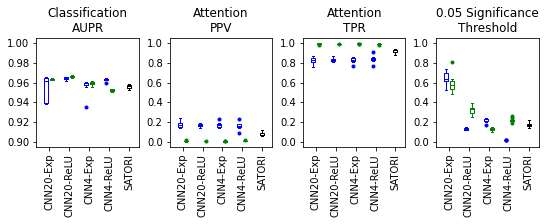

In [5]:
labels = ['Classification\nAUPR', 'Attention\nPPV', 'Attention\nTPR', '0.05 Significance\nThreshold']
ranges = [
    [0.895, 1.005, 0.005],
    [-.05, 1.05, 0.05],
    [-.05, 1.05, 0.05],
    [-.05, 1.05, 0.05]
]

fig = plt.figure(figsize=(9, 2))
ax = fig.subplots(1, 4)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0)

for j in range(ax.shape[0]):
    data = stats[j]
    data1 = data[[0, 2, 4, 6]].transpose()
    data2 = data[[1, 3, 5, 7]].transpose()
    data3 = data[[8]].transpose()
    
    reg_bp = ax[j].boxplot(data1, widths=0.2, positions=np.arange(4)*1.0-0.15, sym='b.')
    norm_bp = ax[j].boxplot(data2, widths=0.2, positions=np.arange(4)*1.0+0.15, sym='g.')
    satori_bp = ax[j].boxplot(data3, widths=0.2, positions=[4])
    
    set_box_color(reg_bp, 'blue')
    set_box_color(norm_bp, 'green')
    set_box_color(satori_bp, 'black')
    
    ax[j].set_xticks(np.arange(5))
    ax[j].set_xticklabels([])
    ax[j].set_xticklabels(categories[[0, 2, 4, 6, 8]], rotation=90, fontsize=10)
    ax[j].set_title(labels[j], fontsize=12)
    ax[j].set_ylim(ranges[j][:2])
    ax[j].set_yticks(np.linspace(ranges[j][0]+ranges[j][2], ranges[j][1]-ranges[j][2], 6))

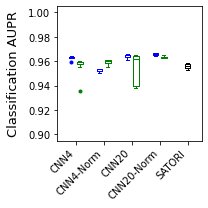

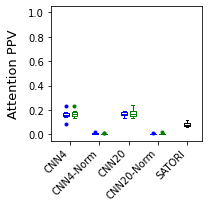

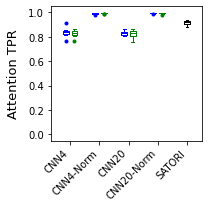

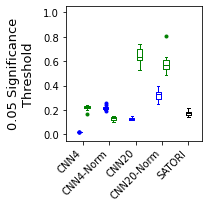

In [9]:
labels = ['Classification AUPR', 'Attention PPV', 'Attention TPR', '0.05 Significance\nThreshold']
ranges = [
    [0.895, 1.005, 0.005],
    [-.05, 1.05, 0.05],
    [-.05, 1.05, 0.05],
    [-.05, 1.05, 0.05]
]

try:
    os.mkdir('local_attention_significance')
except:
    pass

xlabels = ['CNN4', 'CNN4-Norm', 'CNN20', 'CNN20-Norm', 'SATORI']

for j in range(len(labels)):
    
    fig = plt.figure(figsize=(3, 3))
    ax = fig.subplots()
    
    data = stats[j]
    data1 = data[[6, 7, 2, 3]].transpose()
    data2 = data[[4, 5, 0, 1]].transpose()
    data3 = data[[8]].transpose()
    
    relu_bp = ax.boxplot(data1, widths=0.2, positions=np.arange(4)*1.0-0.15, sym='b.', vert=True)
    exp_bp = ax.boxplot(data2, widths=0.2, positions=np.arange(4)*1.0+0.15, sym='g.', vert=True)
    satori_bp = ax.boxplot(data3, widths=0.2, positions=[4], sym='.', vert=True)
    
    set_box_color(relu_bp, 'blue')
    set_box_color(exp_bp, 'green')
    set_box_color(satori_bp, 'black')
    
    ax.set_xticks(np.arange(5))
    ax.set_xticklabels([])
    ax.set_xticklabels(xlabels, rotation=45, fontsize=10, horizontalalignment='right')
    ax.set_ylabel(labels[j], fontsize=13, labelpad=8)
    ax.set_ylim(ranges[j][:2])
    ax.set_yticks(np.linspace(ranges[j][0]+ranges[j][2], ranges[j][1]-ranges[j][2], 6))

    fig.tight_layout()
    fig.savefig(f'local_attention_significance/{labels[j]}.pdf', dpi=300, format='pdf')